In [1]:
import tifffile
import numpy as np
import matplotlib.pyplot as plt
from ganrectf.utils import angles, display_strain_tensor
from ganrectf.ganrec import GANtensor

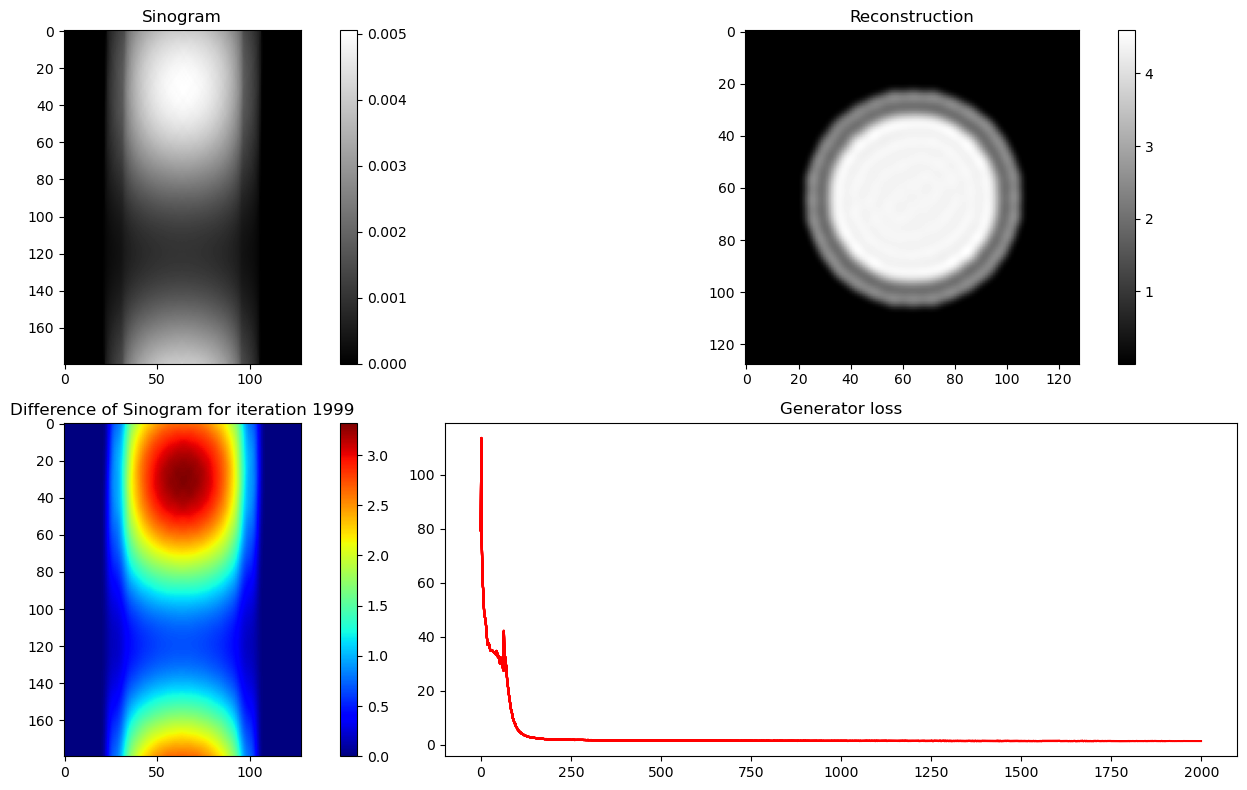

<Figure size 640x480 with 0 Axes>

Reconstruction Progress: 100%|██████████| 2000/2000 [00:25<00:00, 79.83it/s, D_loss=1.34, G_loss=1.45] 


In [2]:
prj = tifffile.imread('/nsls2/users/xyang4/data_tmp/tensor_tomography/strain_sino_tf_3.tiff')
psi = 90
psi = psi * np.pi / 180
nang, px = prj.shape
ang = angles(nang)
# prj = nor_tomo(prj)
rec = GANtensor(prj, ang, psi, iter_num=2000).recon
tifffile.imwrite('/nsls2/users/xyang4/data_tmp/tensor_tomography/strain_recon.tiff', rec)

/nsls2/users/xyang4/ganrec/ganrectf/utils.py:160: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


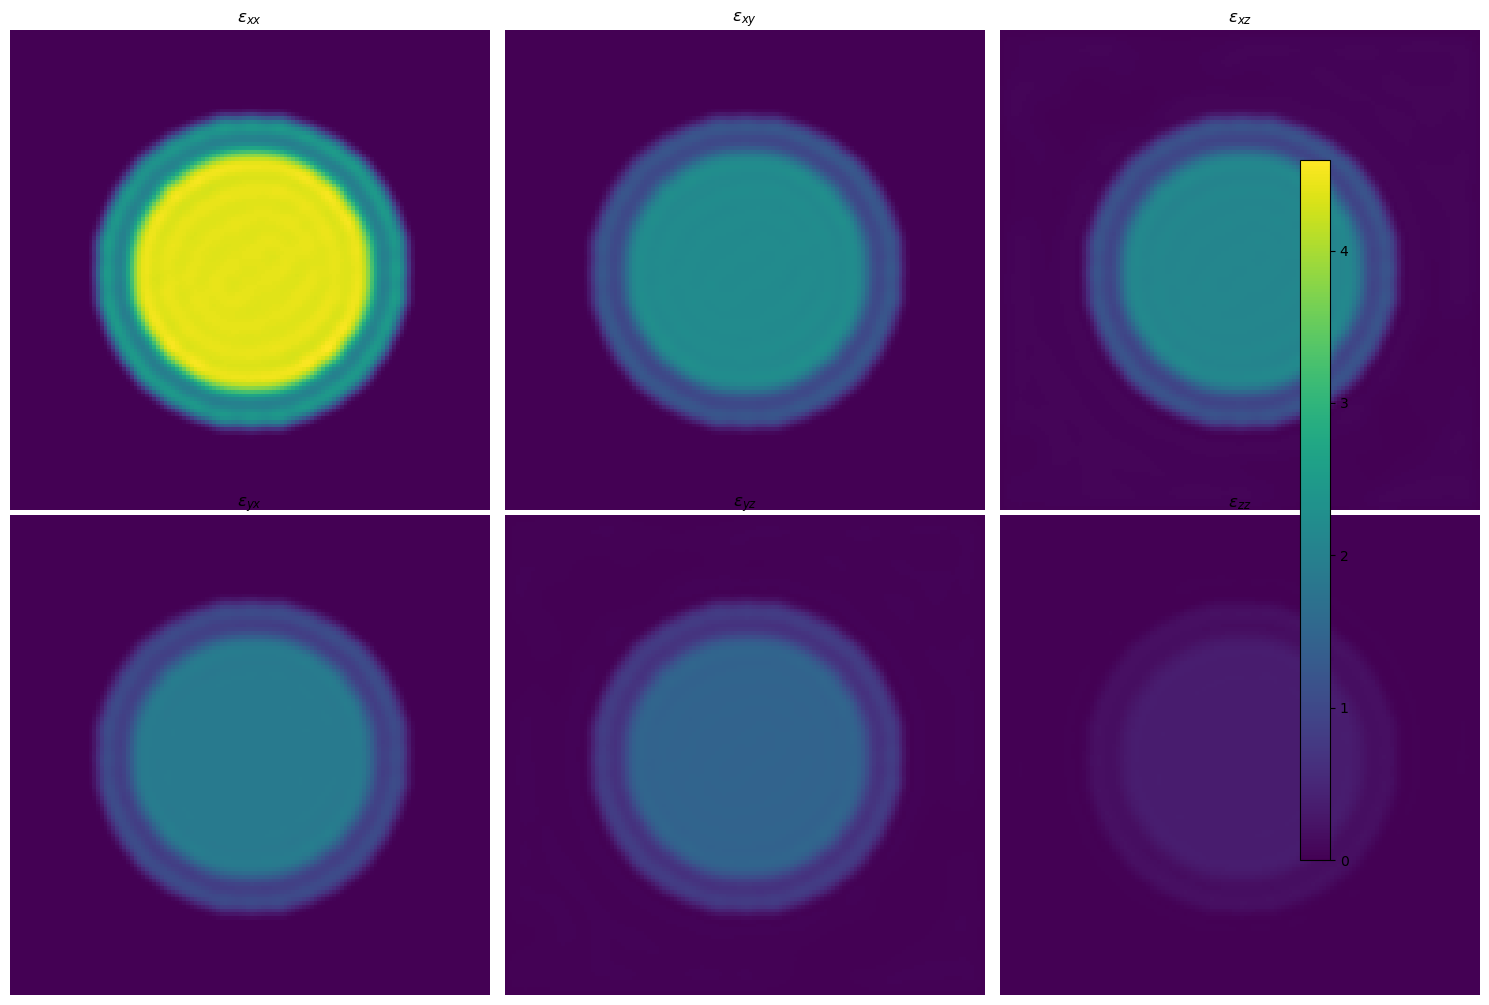

In [3]:
display_strain_tensor(rec)

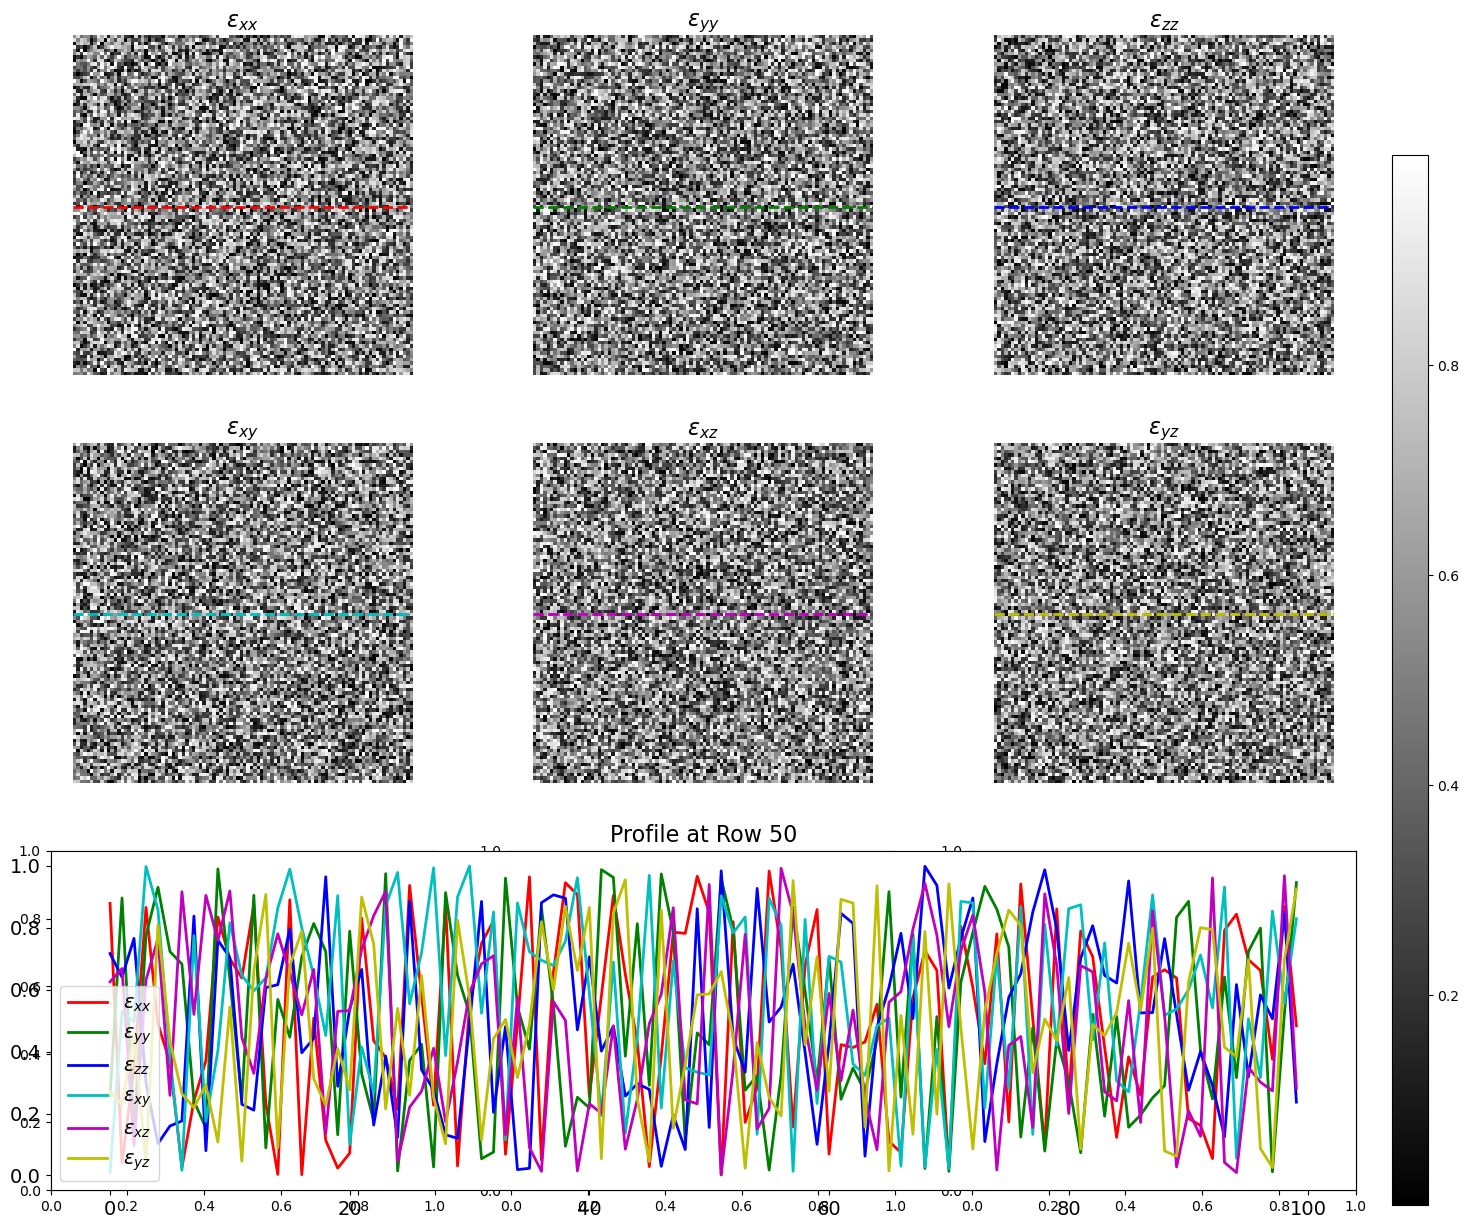

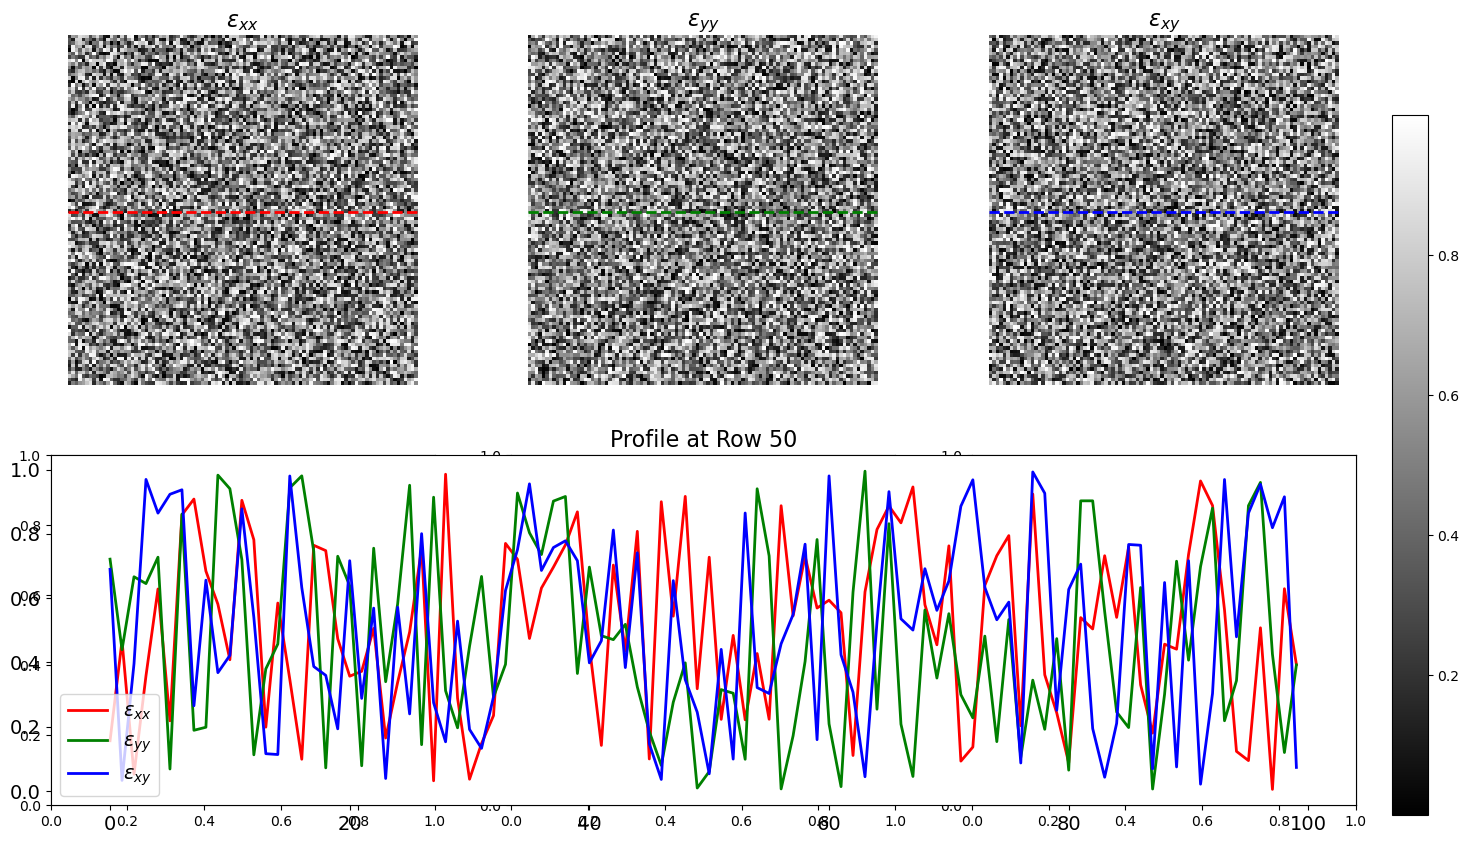

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def display_strain_tensor(tensor, profile_index=None):
    """
    Display the components of the strain tensor and a single horizontal profile plot.

    Parameters:
    tensor (numpy.ndarray): A numpy array of shape [3 or 6, h, w] representing the components of the strain tensor.
    profile_index (int): The index of the row for the profile plot. If None, the middle row is used.

    Components are expected to be in the following order if 6 components:
    0: ε_xx
    1: ε_yy
    2: ε_zz
    3: ε_xy
    4: ε_xz
    5: ε_yz

    Components are expected to be in the following order if 3 components:
    0: ε_xx
    1: ε_yy
    2: ε_xy
    """
    if tensor.shape[0] not in [3, 6]:
        raise ValueError("Input tensor must have 3 or 6 components in the first dimension")

    component_names = [r'$\epsilon_{xx}$', r'$\epsilon_{yy}$', r'$\epsilon_{zz}$', 
                       r'$\epsilon_{xy}$', r'$\epsilon_{xz}$', r'$\epsilon_{yz}$'] if tensor.shape[0] == 6 else \
                      [r'$\epsilon_{xx}$', r'$\epsilon_{yy}$', r'$\epsilon_{xy}$']
    
    rows, cols = (2, 3) if tensor.shape[0] == 6 else (1, 3)
    
    fig, axes = plt.subplots(rows + 1, cols, figsize=(18, 15 if tensor.shape[0] == 6 else 10))
    axes = axes.ravel()

    # Find the global minimum and maximum for the color scale
    vmin = np.min(tensor)
    vmax = np.max(tensor)

    if profile_index is None:
        profile_index = tensor.shape[1] // 2  # Default to the middle row

    profile_colors = ['r', 'g', 'b', 'c', 'm', 'y']
    
    # Plot each component and its profile position marker
    for i in range(tensor.shape[0]):
        row, col = divmod(i, cols)
        ax_image = axes[row * cols + col]
        im = ax_image.imshow(tensor[i], cmap='gray', aspect='equal', vmin=vmin, vmax=vmax)
        ax_image.set_title(component_names[i], fontsize=16)
        ax_image.axis('off')

        # Mark the profile position
        ax_image.axhline(profile_index, color=profile_colors[i], linestyle='--', linewidth=2)

    # Plot the profile on the last row
    ax_profile = fig.add_subplot(rows + 1, 1, rows + 1)
    for i in range(tensor.shape[0]):
        profile = tensor[i, profile_index, :]
        ax_profile.plot(profile, label=component_names[i], color=profile_colors[i], linewidth=2)
    ax_profile.set_title(f"Profile at Row {profile_index}", fontsize=16)
    ax_profile.legend(fontsize=14)
    ax_profile.tick_params(axis='both', which='major', labelsize=14)

    # Adjust layout to make space for the colorbar
    fig.subplots_adjust(right=0.85)
    
    # Add a single colorbar for the first two rows of subplots on the right side
    if 
    cbar_ax = fig.add_axes([0.87, 0.1, 0.02, 0.7])  # [left, bottom, width, height]
    fig.colorbar(im, cax=cbar_ax, orientation='vertical')
    
    plt.show()

# Example usage:
# Create a random strain tensor with shape [6, h, w] for 6 components
h, w = 100, 100
tensor_6 = np.random.rand(6, h, w)
display_strain_tensor(tensor_6)

# Create a random strain tensor with shape [3, h, w] for 3 components
tensor_3 = np.random.rand(3, h, w)
display_strain_tensor(tensor_3)
